In [33]:
%matplotlib inline
import numpy as np
import math
from matplotlib import pyplot as plt

## 1D Gradient Descent

1) Let us consider the function
$$ f(x) = (x-2)^2 + 1 $$
First plot it.

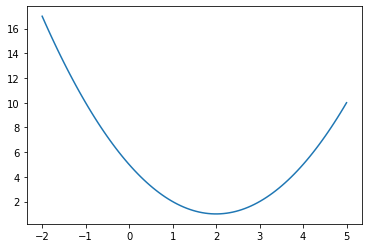

In [3]:
xs = np.linspace(-2, 5, 100)
ys = (xs-2)**2 + 1
plt.plot(xs, ys)

2) If we start at $x=4$, which way should we move and why?

In [4]:
# Left, because the slope at point x = 4 is positive. That means the line is ascending and to reach the min point,
# to go the opposite side of ascending

3)If the step size is constants = 1.1, what does the update rule look like?

$$x_{n+1} = \ldots$$

In [6]:
# x_{n+1} = x_n + direction*stepsize

# x_{n+1} = x_n + ( -f'(x)/abs(f'(x)) )*1.1

4)Let try it with step size = 1.1. For 10 iteration. Print and plot your point as you go. Can you understand the behavior?

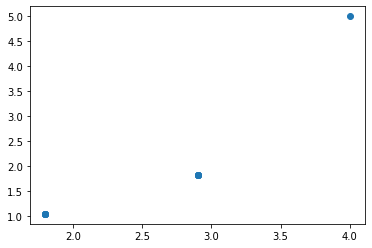

In [9]:
def direction(x):
    diff_func = 2*(x-2)
    return -diff_func/abs(diff_func)

def func(x):
    return (x-2)**2 + 1

def walk_to_min(x0, n):
    x = x0
    guesses = [x]
    
    for i in range(10):
        x = x + direction(x)*1.1
        guesses.append(x)
    return guesses

guesses = walk_to_min(4, 10)

plt.plot(guesses, [func(guess) for guess in guesses], 'o')


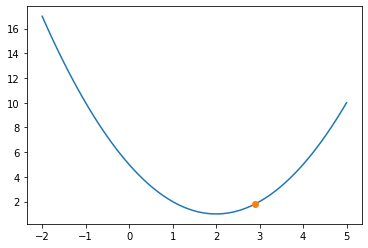

In [11]:
def df(x):
    return 2*(x-2)

def walk_to_min(step_size, n, x0):
    x = x0
    guesses = []
    
    for i in range(n):
        direction = -df(x)/abs(df(x))
        x = x + direction * step_size
        guesses.append(x)
        return guesses, x
    
guesses, xmin = walk_to_min(1.1, 10, 4)

xs = np.linspace(-2, 5, 100)
ys = (xs-2)**2 + 1
plt.plot(xs, ys)

def f(x):
    return (x-2)**2 + 1

plt.plot(guesses, [f(guess) for guess in guesses], 'o')

5)Now let's try step size=0.01 for 100 iteration. Print and plot your point as you go. Can you understand the behavior?

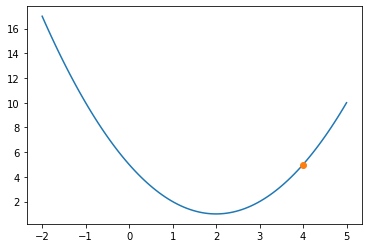

In [12]:
guesses, xmin = walk_to_min(0.01, 100, 4)

xs = np.linspace(-2, 5, 100)
ys = (xs-2)**2 + 1
plt.plot(xs, ys)

def f(x):
    return (x-2)**2 + 1

plt.plot(guesses, [f(guess) for guess in guesses], 'o')

6) When do we want the step size to be small and when do you want the step size to be big?

In [ ]:
# Small step size is bad since it takes a long time to reach minimum, but it gives good accuracy
# Large step size is good for long distances since it takes a short time to reach minimum, bit it gives bad accuracy

# We use small step sizes when we're near the minimmum
# We use large step sizes when we're far from the minimmum

7) What function kind of does that?

8)If we use that function, what does the update rule looks like.

In [ ]:
# x_{n+1} = x_n - f'(x_n)*eta // eta = lambda

9) Try it with $\lambda=0.1$. Print and Plot to see what happens?

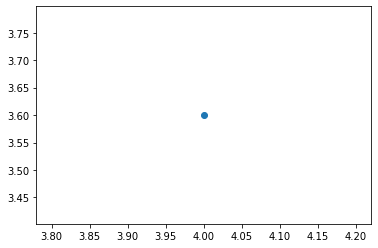

In [32]:
def df(x):
    return 2*(x-2)
y = 4 - df(4)*0.1

plt.plot(4, y, 'o')

10) Try it with $\lambda = 1.1$. For 4 iterations. Can you see how it goes?

In [29]:
def gradient_desc(df, learning_rate, x0, n):
    x = x0
    guesses =[]
    
    for i in range(n):
        x = x - df(x)*learning_rate
        guesses.append(x)
    return guesses, x

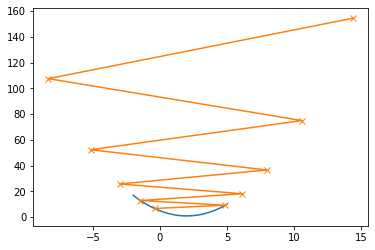

In [30]:
def f(x):
    return (x-2)**2 + 1

def df(x):
    return 2*(x-2)

guesses, x = gradient_desc(df, 1.1, 4, 10)
xs = np.linspace(-2, 5, 100)
ys = f(xs)
plt.plot(xs, ys)

plt.plot(guesses, [f(guess) for guess in guesses], '-x')

### Multi-Dimension Gradient Descent

1) Let us consider the function.
$$f(x,y) = (x-2)^2 + xy + y^2 + 1$$
Make the 3D plot.

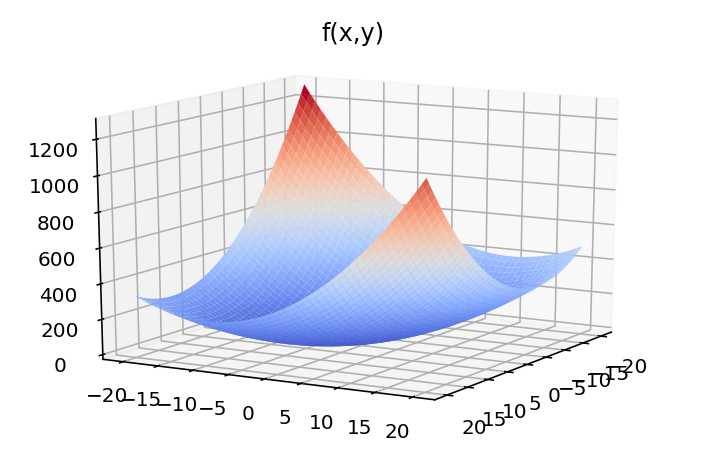

In [3]:
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm
#see matplotlib3d surface
def f(x,y):
    return (x-2)**2+x*y+y**2+1
nx = 200
ny = 200
x = np.linspace(-20,20,nx)
y = np.linspace(-20,20,ny)
xgrid, ygrid = np.meshgrid(x, y)
#print ygrid
uz = np.zeros((nx,ny))
for ix in range(nx):
    for iy in range(ny):
        xx = x[ix]
        yy = y[iy]
        uz[iy,ix] = f(xx,yy) ##<<<<<<This is not a typo: [iy,ix]
        
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
plt.gca().view_init(elev=15., azim=30)
ucs = ax.plot_surface(xgrid, ygrid, uz, cmap=cm.coolwarm)
plt.title('f(x,y)')

2) Plot the contour.

Text(0.5, 1.0, 'f(x,y)')

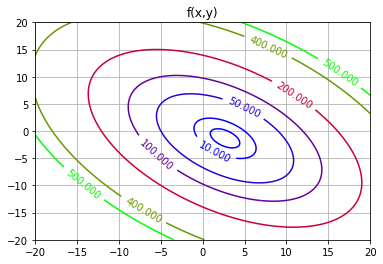

In [34]:
from matplotlib import cm
#see http://matplotlib.org/examples/pylab_examples/contour_demo.html
def f(x,y):
    return (x-2)**2+x*y+y**2+1

nx = 200
ny = 200
x = np.linspace(-20,20,nx)
y = np.linspace(-20,20,ny)
xgrid, ygrid = np.meshgrid(x, y)
#print ygrid
uz = np.zeros((nx,ny))

for ix in range(nx):
    for iy in range(ny):
        xx = x[ix]
        yy = y[iy]
        uz[iy,ix] = f(xx,yy) ##<<<<<<This is not a typo: [iy,ix]

ucs = plt.contour(x, y, uz, [2,10,50,100,200,400,500], cmap=cm.brg)
plt.clabel(ucs, inline=1, fontsize=10)
plt.grid()
plt.title('f(x,y)')

3)Where do you think the minimum is?

In [ ]:
# Center

4)What is the gradient at (10,-15)? Use plt.arrow to plot arrow.

5) If we want to minimize the function which way should we go? Find the unit vector in that direction.

6) What should your update rule look like? Use vector addition.

7) Use what we learn in 1D. How far should we go? What should the update rule really look like?

8) Use $\lambda = 0.1$ and see where the points go

In [37]:
from scipy.optimize import minimize

def f(v):
    x, y = v
    return (x-2)**2 + x*y + y**2 + 1
res = minimize(f, [-15, 10])
x, y = res.x
print(x,y)

2.6666672599679693 -1.3333333118296335


### Linear Regression Revisited

Let us consider the problem of finding a line that pass through the points.

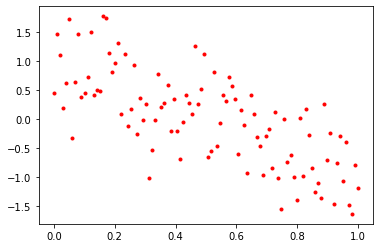

In [41]:
np.random.seed(123)
n = 100
dx = np.linspace(0,1,n)
dy = -2*dx + 1 + np.random.randn(n)/2
plt.plot(dx,dy,'.r')

1) What exactly are we trying to minimize and why?

2) Minimize and Visualize it.

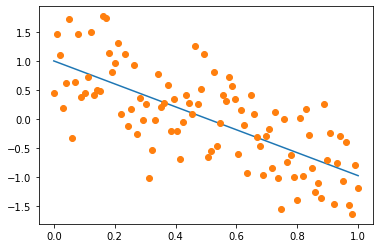

In [42]:
# cost(m,c) = sum( (m*dx + c - dy)**2 )

def cost(v):
    m, c = v
    return np.sum((m*dx + c - dy)**2)

res = minimize(cost, np.array([10, 15]))
m, c = res.x
xs = np.linspace(0, 1, 100)
ys = m*xs + c
plt.plot(xs, ys)
plt.plot(dx, dy, 'o')

### Separating Line.

We want to draw a separating line betwen two datasets shown below.

In [46]:
np.random.seed(234)
n1 = 100
n2 = 100
mean = [0, 0]
cov = [[1, -0.5], [-0.5, 1]]
r1, r2 = np.random.multivariate_normal(mean, cov, n1).T
#plt.plot(r1, r2, '.r')

mean = [2, 2]
cov = [[1, 0], [0, 1]]
b1, b2 = np.random.multivariate_normal(mean, cov, n2).T
#plt.plot(b1, b2, '.b')

c = np.zeros(n1+n2)
c[:n1] = 1.
c[n1:] = 0.
#print c

d = np.zeros((n1+n2,2))
d[:n1,0] = r1
d[:n1,1] = r2
d[n1:,0] = b1
d[n1:,1] = b2

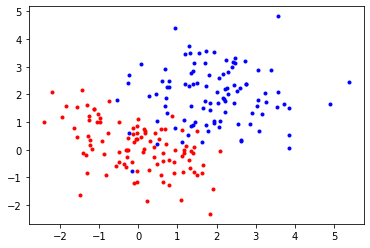

In [47]:
plt.plot(d[c==1,0], d[c==1,1],'.r')#note boolean indexing
plt.plot(d[c==0,0], d[c==0,1],'.b')#note boolean indexing

1) How can we model this as a optimization problem?

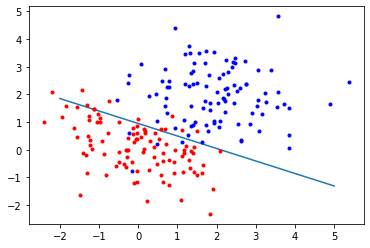

In [48]:
def cost(v):
    m, b = v
    xs = d[:, 0]
    ys = d[:, 1]
    line_y = m*xs + b
    above = ys > line_y
    below = ~above
    
    red = c==1
    blue = c==0
    
    red_above = d[red & above]
    red_below = d[red & below]
    
    blue_above = d[blue & above]
    blue_below = d[blue & below]
    
#     score = len(red_below) + len(blue_above) # right position
#     score = score - len(red_above) - len(blue_below) # wrong position
    red_wrongness = (line_y[red & above] - red_above[:, 1])**2
    blue_wrongness = (line_y[blue & below] - blue_below[:, 1])**2
    score = np.sum(red_wrongness) + np.sum(blue_wrongness)
    
    return score

res = minimize(cost, [-1,2])
m, b = res.x

xs = np.linspace(-2, 5, 100)
ys = m*xs + b

plt.plot(xs, ys)

plt.plot(d[c==1,0], d[c==1,1],'.r')#note boolean indexing
plt.plot(d[c==0,0], d[c==0,1],'.b')#note boolean indexing